# Author:- Sweeti Kumari

# Objective of the Task:
Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’:

● Here, we will try to find out the weak areas where we can work to make more profit.

● We will find out business problems that can be derived by exploring the data.

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data analysis and data cleaning

 This is basically a retail dataset of United States across 50 States 
 'Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'
 

In [3]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
c =['Postal Code','Country']
df = df.drop(columns=c,axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# data visualization

<AxesSubplot:>

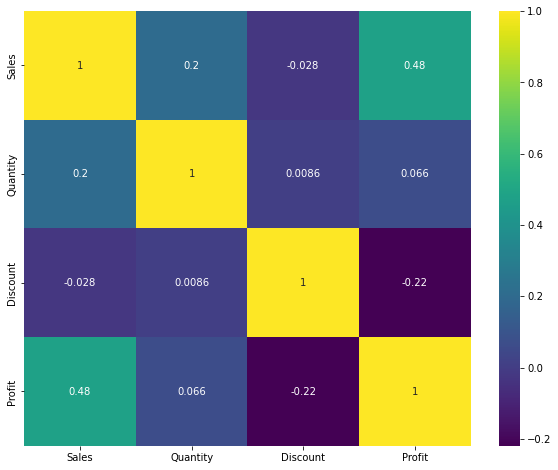

In [7]:
# Drawing Heatmap for identifying correlation between numeric columns
plt.figure(figsize=(10,8))
correlation = df.corr()
sb.heatmap(correlation, annot=True,cmap="viridis")

Observation:
1. Here we see that there is positive correlation between Sales & Profit(0.48) means on increasing sale profit increases
2. And there is negative correlation between Profit & Discount(-0.22) means on increasing discount , profit decreases

In [8]:
total_profit_per_state=df.groupby('State')['Profit'].sum()
total_profit_per_state[:4]

State
Alabama        5786.8253
Arizona       -3427.9246
Arkansas       4008.6871
California    76381.3871
Name: Profit, dtype: float64

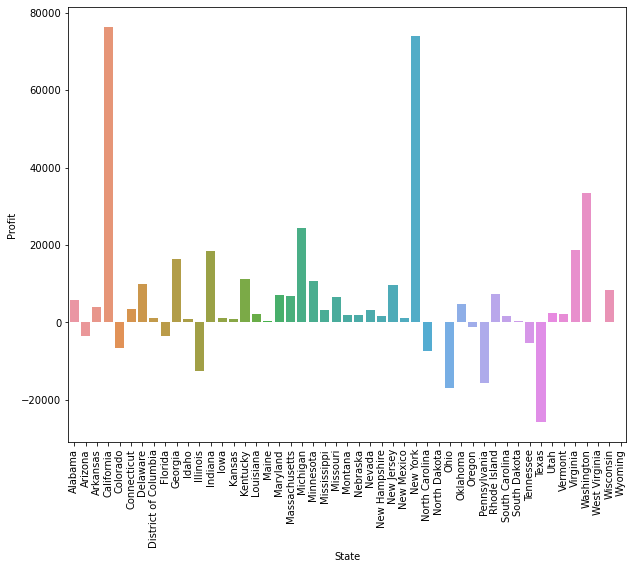

In [9]:
# we can also plot state wise profit for visualization
plt.figure(figsize=(10,8))
sb.barplot(x= total_profit_per_state.index, y= total_profit_per_state.values)
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

Observation: 
1. Based on the above data we can say that "California","New York","Washington","Michigan" states of U.S have maximum profit, we can increase sale in these area to increase profit 
2. and the top 4 loss giving states are:"Texas","Ohino","Pennsylvania","Illinois",

In [10]:
total_sales_per_state = df.groupby('State')['Sales'].sum()

total_sales_per_state.head()

State
Alabama        19510.6400
Arizona        35282.0010
Arkansas       11678.1300
California    457687.6315
Colorado       32108.1180
Name: Sales, dtype: float64

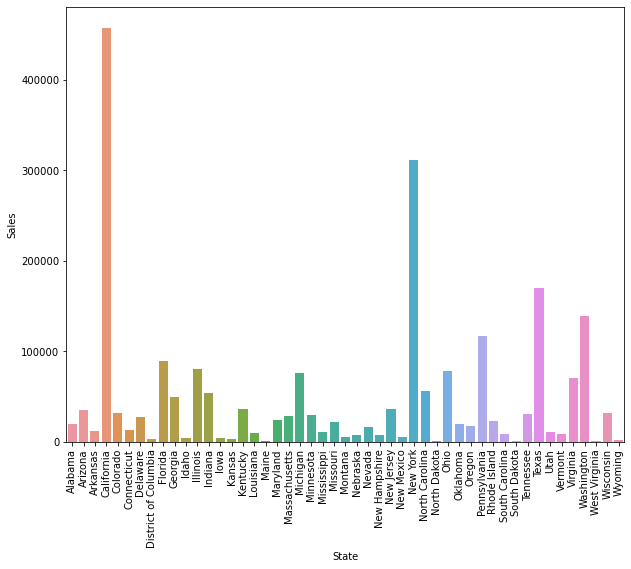

In [11]:
# we can also plot state wise sales for visualization
plt.figure(figsize=(10,8))
sb.barplot(x= total_sales_per_state.index, y= total_sales_per_state.values)
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

Observation:
1. Top 4 states with highest sale:"California","New York","Texas","Washington"
2. Top 4 states with lowest sales: "South Dakota", "Maine","West Virginia","North Dakota"
3. Thus , "Texas" has high sales but low profit

C:\Users\91790\AppData\Local\Temp/ipykernel_10296/2667076710.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  profit_sales = df.groupby("State")["Profit","Sales"].sum()


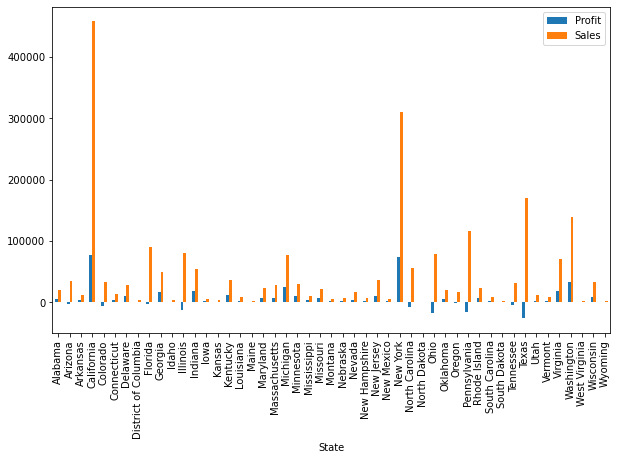

In [12]:
# comparing sales and profit state wise

profit_sales = df.groupby("State")["Profit","Sales"].sum()
profit_sales.plot.bar(figsize=(10,6))
plt.show()

Observation:
Here we found that Texas, Pennsylvania, and Ohio have high sales but negative Profit i.e loss

In [13]:
#state wise average discount percent of USA
State_wise_discount = df.groupby("State")["Discount"].mean()*100
State_wise_discount.head()

State
Alabama        0.000000
Arizona       30.357143
Arkansas       0.000000
California     7.276362
Colorado      31.648352
Name: Discount, dtype: float64

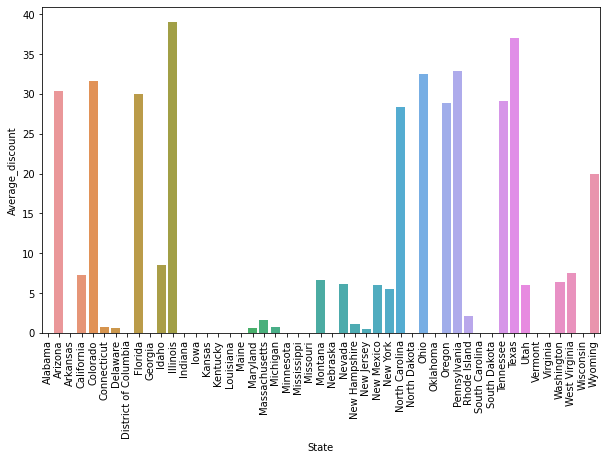

In [14]:
plt.figure(figsize=(10,6))
sb.barplot(x= State_wise_discount.index, y= State_wise_discount.values)
plt.ylabel("Average_discount")
plt.xticks(rotation=90)
plt.show()

Observation: Illinois has the highest Avg_discount_percent among the states of USA

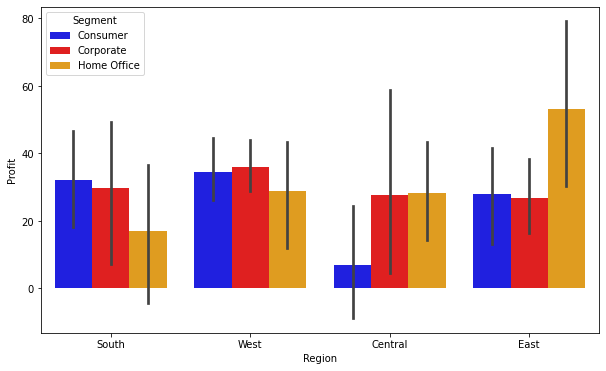

In [20]:
# Distrubution of Profits of Segment across diffrent regions
plt.figure(figsize = (10,6))
sb.barplot(data = df , x = "Region",y = "Profit" ,hue = "Segment", palette=['blue','red','orange','yellow'])
plt.show()

Observation: Highest profits for each region are as follows:

South= Consumer Segment

West= Corporate Segment

Central= Home Office Segment

East= Home Office Segment

Lowest profits for each region are as follows:

South= Home Office Segment

West= Home Office Segment

Central= Consumer Segment

East= Corporate Segment

In [22]:
# Analyzing Category wise sales, Discount, Profit:


category_data = df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
category_data

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


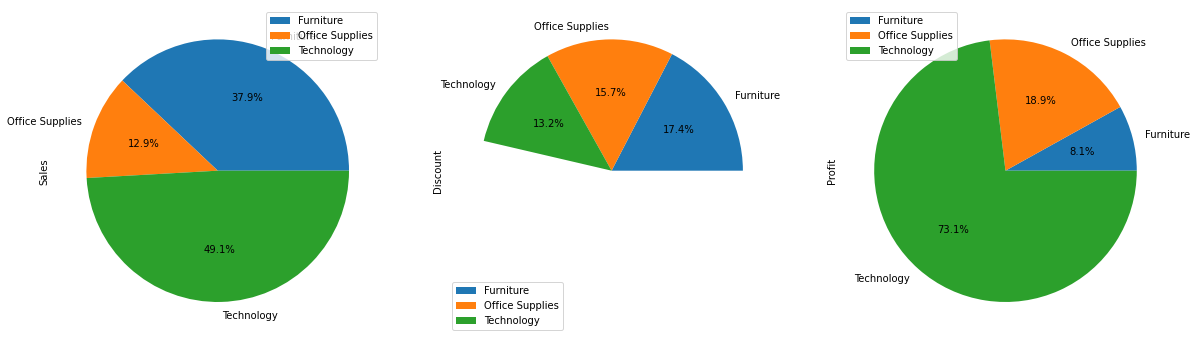

In [23]:
# Pie Charts of Category wise sales, Discount, Profit
category_data.plot.pie(subplots=True, figsize=(20, 18),autopct='%0.1f%%', labels = category_data.index)
plt.show()

Inference:

1)Technology Category has the maximum Sales and Profit.

2)Office Supplies category has minimum sales and Furniture category has lowest Profit.

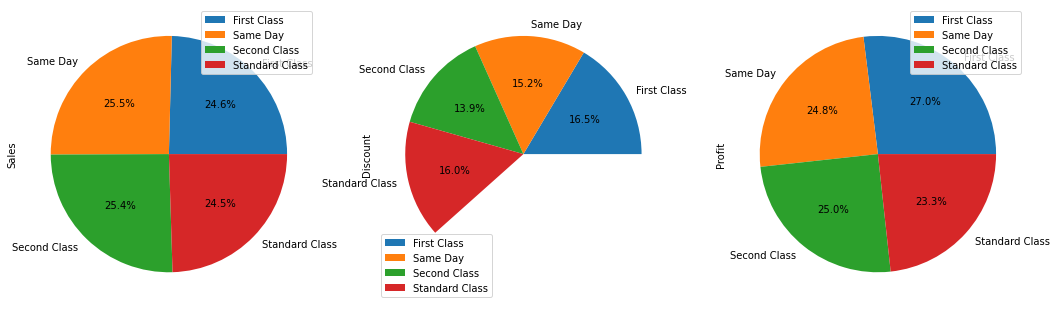

In [24]:
# Analyzing Ship Mode wise sales, Discount, Profit

shipmode_data = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()
shipmode_data.plot.pie(subplots=True,figsize=(18, 20), autopct='%0.1f%%', labels = shipmode_data.index)
plt.show()

Inference:

1) Same Day Ship Mode has the highest sales.

2) First Class Ship mode has the highest Profit and Discount

3) Standard Class Ship mode has lowest sales.

4) Standard Class Ship mode has lowest profit.

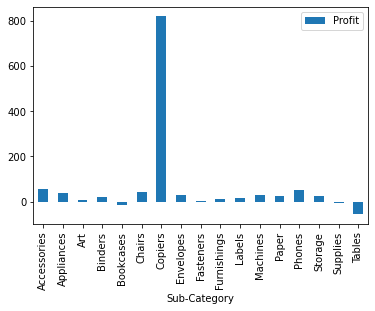

In [25]:
# Checking the profits of 'Sub- Category'
pivot=pd.pivot_table(df,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')
plt.show()

Observation: Among 'Sub- Category' items, Copiers has the highest profits in United States. Tables 'Sub- Category' is in loss.

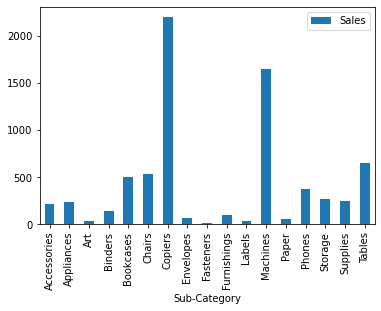

In [26]:
# Checking the Sales of 'Sub- Category'
pivot1=pd.pivot_table(df,index='Sub-Category',values='Sales')
pivot1.plot(kind='bar')
plt.show()

Observation: Among 'Sub- Category' items, Copiers and machines have the highest Sales in United States.Here we see that copiers had highest sale and Machines had second highest sales.In above two graph we see that 'Machines' had second highest sale but due to large discount it has less profit.

Low Sales 'Sub- Category' items: Fasteners, Labels, Paper, Art

Exploratory Data Analysis on Retail Dataset- SampleSuperstore

Objective of the Task: Perform ‘EDA on dataset ‘SampleSuperstore’: 
● Here, we will try to find out the weak areas where we can work to make more profit. 
● We will find out business problems that can derived by exploring the data.

Language and modules: Python, Pandas, seaborn, matplotlib. 

IDE: Jupyter Notebook

Conclusions of the Task

1. Top 4 profit giving states: 'California','New York','Washington' and 'Michigan'. We can increse sales in these states for increasing profit.

2. Top 4 loss giving states:'Illinois','Pennsylvania','Ohio' and 'Texas'. We have to pay attention to these states for reducing the loss and making these states on a positive cash flow.

3. Top 4 States with highest Sales : 'California','New York','Texas'and 'Washington' and Top 4 states with lowest Sales:'North Dakota','Maine','West Virginia'and'South Dakota'. We have to increase the sales of low sales states.

4. Texas, Pennsylvania, and Ohio have high Sales but negative Profit i.e. loss. This is becuse of the high discounts given to customer. We need to decrease discount percentage at Texas, Pennsylvania, and Ohio.

5. Illinois has the highest Avg_discount_percent among the states of USA but profit and sales are low here. So we can reduce discount % in Illinois

6. Highest profits for each region are as follows:South= Consumer Segment, West= Corporate Segment,Central= Home Office Segment and East= Home Office Segment. We can increase the sales of respective highest profit making segments in the respective region.

7. Lowest profits for each region are as follows: South= Home Office Segment, West= Home Office Segment,Central= Consumer Segment and East= Corporate Segment. We have to focus on these states for increasing their profits.

8. Technology Category has the maximum Sales and Profit.This is because we have given lowest discounts for Technology category.Thus here we can say that If we give more Discount on products our sales goes increses but Profit get down.

9. Office Supplies category has minimum sales and Furniture category has lowest Profit. We have to focus on these categories.

10. Same Day Ship Mode has the highest sales and First Class Ship mode has the highest Profit and Discount. So, we have to use Same Day Ship Mode and First Class Ship in greater frequency.

11. Standard Class Ship mode has lowest sales and lowest profit. So, We can avoid this ship mode.

12. Among 'Sub- Category' items, Copiers has the highest profits in united States. Tables 'Sub- Category' is in loss. So, we have to focus on Tables 'Sub- Category'.

13. Among 'Sub- Category' items, Copiers and machines have the highest Sales in united States.Here we see that copiers had highest sale and Machines had second highest sales.In above two graph we see that 'Machines' had second highest sale but due to large discount it has less profit.

14. Low Sales 'Sub- Category' items: Fasteners, Labels, Paper, Art. We have to concentrate on these 'Sub- Category' items.